# Assignment:
1. Perform a fit on data using a linear model and a quadratic model.
2. Measure the Euclidean distance (mean squared error) of each model on the dataset.
3. Try to guess a function that explains the data better. Measure its performance.


# Stretch Goals:
- Try a different loss function (such as a different $L_p$ norm). Answer: Does the order of models change in terms of performance?
- Try other regression methods from scikit-learn. Measure their performance. Which is the best?
- Answer: What would you expect the $L_0$ and $L_\infty$ norms to do?

In [104]:
import numpy as np

with open('../Part 1/test_data.csv') as f:
    data = np.loadtxt(f, delimiter=',')

# Sort data by X axis we will use... better way?
data = data[np.argsort(data, axis=0)[:,0]]
    
input_data = data[:,0]  # first column
output_data = data[:,2]  # third column

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_input = input_data.reshape(-1, 1)
train_output = output_data.reshape(-1, 1)

line_model = make_pipeline(LinearRegression())
line_model.fit(train_input, train_output)
line_preds = line_model.predict(train_input)

quad_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad_model.fit(train_input, train_output)
quad_preds = quad_model.predict(train_input)

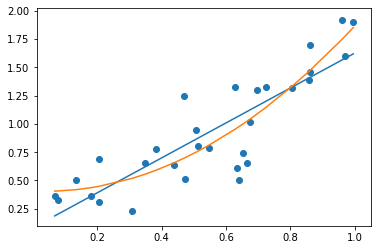

In [106]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.scatter(input_data, output_data)
plt.plot(train_input, line_preds)
plt.plot(train_input, quad_preds)
plt.show()

In [107]:
L = lambda preds, p: np.sum((preds - train_output)**p)**(1/p)

In [108]:
L(line_preds, 2), L(quad_preds, 2)

(1.3753892131781016, 1.2214954314006052)